In [2]:
!pip install seaborn

     |████████████████████████████████| 215 kB 3.2 MB/s eta 0:00:01


In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

print("TensorFlow version: {}".format(tf.__version__)) 

TensorFlow version: 2.2.0


In [4]:
dataset_path = tf.keras.utils.get_file("auto-mpg.data", "https://raw.githubusercontent.com/PacktWorkshops/The-Reinforcement-Learning-Workshop/master/Chapter03/Dataset/auto-mpg.data")

column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

32768/30286 [================================] - 0s 0us/step


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [6]:
dataset = dataset.dropna()

In [7]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [8]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

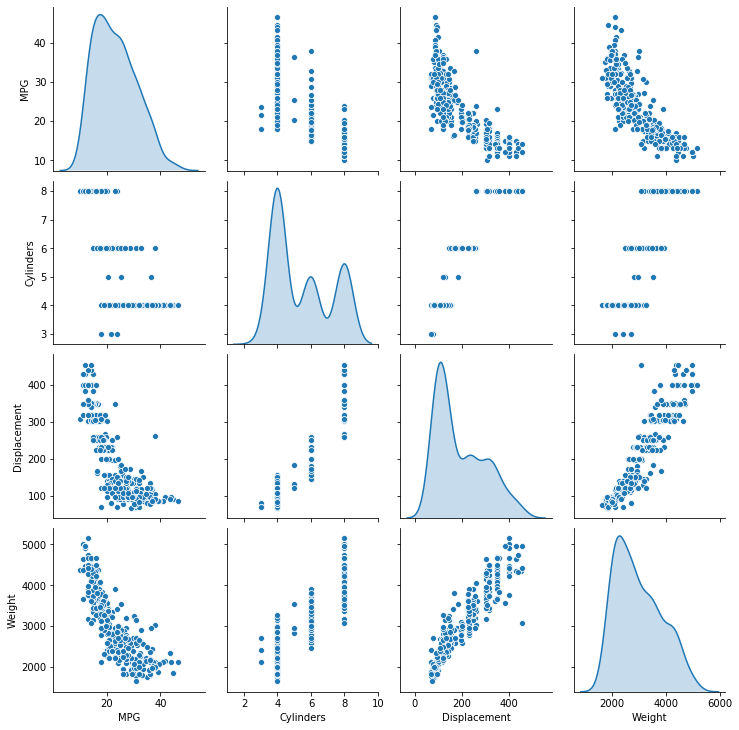

In [9]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [10]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [11]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [12]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

model = build_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 1000

history = model.fit(normed_train_data, train_labels,
  epochs=epochs, validation_split = 0.2, verbose=2)

Epoch 1/1000
8/8 - 0s - loss: 562.2876 - mae: 22.4078 - mse: 562.2876 - val_loss: 551.9179 - val_mae: 22.1029 - val_mse: 551.9179
Epoch 2/1000
8/8 - 0s - loss: 511.1389 - mae: 21.2044 - mse: 511.1389 - val_loss: 495.2697 - val_mae: 20.7540 - val_mse: 495.2697
Epoch 3/1000
8/8 - 0s - loss: 457.2976 - mae: 19.8865 - mse: 457.2976 - val_loss: 432.0287 - val_mae: 19.1711 - val_mse: 432.0287
Epoch 4/1000
8/8 - 0s - loss: 397.3228 - mae: 18.3588 - mse: 397.3228 - val_loss: 364.1095 - val_mae: 17.3614 - val_mse: 364.1095
Epoch 5/1000
8/8 - 0s - loss: 334.6004 - mae: 16.6211 - mse: 334.6004 - val_loss: 296.2048 - val_mae: 15.3676 - val_mse: 296.2048
Epoch 6/1000
8/8 - 0s - loss: 271.0001 - mae: 14.7336 - mse: 271.0001 - val_loss: 228.4179 - val_mae: 13.2025 - val_mse: 228.4179
Epoch 7/1000
8/8 - 0s - loss: 208.6372 - mae: 12.7526 - mse: 208.6372 - val_loss: 167.6743 - val_mae: 11.1024 - val_mse: 167.6743
Epoch 8/1000
8/8 - 0s - loss: 153.0838 - mae: 10.7243 - mse: 153.0838 - val_loss: 118.3047

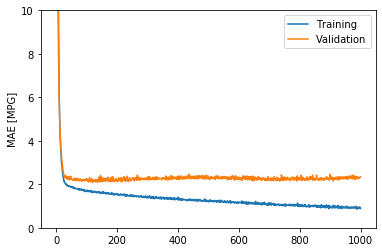

In [12]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

plt.plot(hist['epoch'],hist['mae'])
plt.plot(hist['epoch'],hist['val_mae'])
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')
plt.legend(["Training", "Validation"])

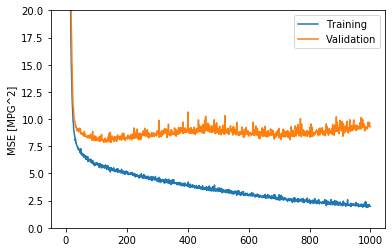

In [13]:
plt.plot(hist['epoch'],hist['mse'])
plt.plot(hist['epoch'],hist['val_mse'])
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')
plt.legend(["Training", "Validation"])

In [14]:
model = build_model()

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=epochs, validation_split = 0.2, verbose=2, 
                    callbacks=[early_stop])

Train on 251 samples, validate on 63 samples
Epoch 1/1000
251/251 - 0s - loss: 578.2651 - mae: 22.7891 - mse: 578.2651 - val_loss: 575.4479 - val_mae: 22.6761 - val_mse: 575.4479
Epoch 2/1000
251/251 - 0s - loss: 536.6135 - mae: 21.8435 - mse: 536.6135 - val_loss: 532.3114 - val_mae: 21.6708 - val_mse: 532.3114
Epoch 3/1000
251/251 - 0s - loss: 495.4688 - mae: 20.8617 - mse: 495.4688 - val_loss: 484.6943 - val_mae: 20.5125 - val_mse: 484.6943
Epoch 4/1000
251/251 - 0s - loss: 450.4576 - mae: 19.7450 - mse: 450.4576 - val_loss: 434.3413 - val_mae: 19.2148 - val_mse: 434.3413
Epoch 5/1000
251/251 - 0s - loss: 401.5700 - mae: 18.4462 - mse: 401.5700 - val_loss: 379.7068 - val_mae: 17.7162 - val_mse: 379.7068
Epoch 6/1000
251/251 - 0s - loss: 348.1165 - mae: 16.9505 - mse: 348.1165 - val_loss: 321.0873 - val_mae: 16.0297 - val_mse: 321.0873
Epoch 7/1000
251/251 - 0s - loss: 291.5176 - mae: 15.3141 - mse: 291.5176 - val_loss: 260.4770 - val_mae: 14.2428 - val_mse: 260.4771
Epoch 8/1000
251/

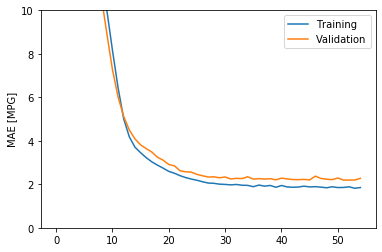

In [15]:
early_hist = pd.DataFrame(early_history.history)
early_hist['epoch'] = early_history.epoch

plt.plot(early_hist['epoch'],early_hist['mae'])
plt.plot(early_hist['epoch'],early_hist['val_mae'])
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')
plt.legend(["Training", "Validation"])

In [16]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

78/78 - 0s - loss: 6.3440 - mae: 1.8722 - mse: 6.3440
Testing set Mean Abs Error:  1.87 MPG


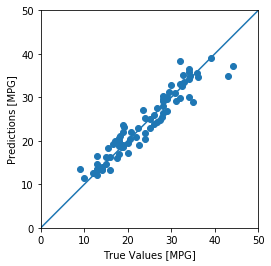

In [17]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
